# Multi-layer perceptron (CAP5602 Lecture 9)

In this demo, we will train and test a multi-layer perceptron model on the MNIST handwritten digits dataset.

## 1. Load dataset

To load the original MNIST dataset, we can use the [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html#sklearn.datasets.fetch_openml) method. Since this method will need to download the dataset and load it into memory, it will take a while.

Note that an MNIST image has shape 28 x 28. Here the images have already been flatten to a vector of size 784.

In [1]:
from sklearn.datasets import fetch_openml

X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X = X / 255.  # Scale the pixel values to be in [0, 1]

print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


## 2. Split dataset into train/test sets

Traditionally, we use 10,000 examples for the test set.

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=10000, random_state=42)

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


## 3. Show a training example and its label

We can reshape an example into a 28 x 28 matrix and plot it using matplotlib.

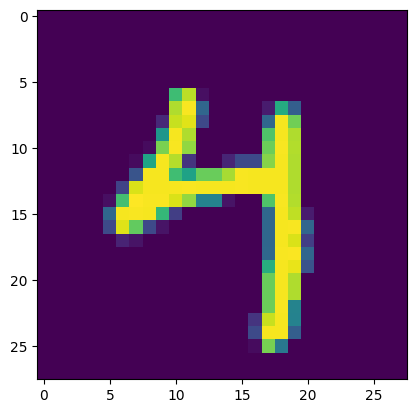

4


In [3]:
import matplotlib.pyplot as plt

img_id = 10
image = X_train[img_id].reshape((28, 28))
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label)

### 4. Define and train an MLP classifier

We will define and train an MLP classifier with one hidden layer that contains 50 neurons and uses ReLU activation. This classifier will be trained with SGD for 30 epochs. We also set 'verbose=True' to track the training progress.

In [4]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, solver='sgd', verbose=True)
mlp.fit(X_train, Y_train)

Iteration 1, loss = 1.53803840
Iteration 2, loss = 0.77803383
Iteration 3, loss = 0.57452110
Iteration 4, loss = 0.48860459
Iteration 5, loss = 0.44053133
Iteration 6, loss = 0.40922773
Iteration 7, loss = 0.38667119
Iteration 8, loss = 0.36947039
Iteration 9, loss = 0.35586436
Iteration 10, loss = 0.34440778
Iteration 11, loss = 0.33464395
Iteration 12, loss = 0.32617708
Iteration 13, loss = 0.31870996
Iteration 14, loss = 0.31189600
Iteration 15, loss = 0.30577945
Iteration 16, loss = 0.30004374
Iteration 17, loss = 0.29474572
Iteration 18, loss = 0.28982686
Iteration 19, loss = 0.28497290
Iteration 20, loss = 0.28051375
Iteration 21, loss = 0.27616959
Iteration 22, loss = 0.27187584
Iteration 23, loss = 0.26801123
Iteration 24, loss = 0.26404997
Iteration 25, loss = 0.26039204
Iteration 26, loss = 0.25685238
Iteration 27, loss = 0.25335153
Iteration 28, loss = 0.25004185
Iteration 29, loss = 0.24695568
Iteration 30, loss = 0.24377497


/Users/michaelcordero/Library/Caches/pypoetry/virtualenvs/cap-5602-ai-nGwmg2tw-py3.10/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, solver='sgd', verbose=True)

## 5. Show a test example and its predicted label

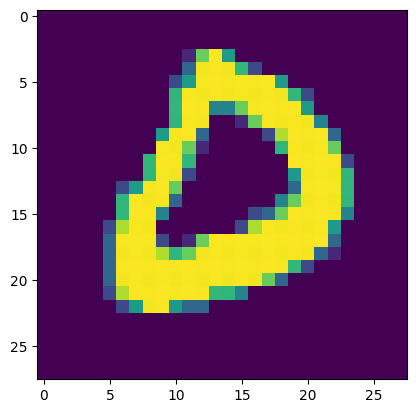

['0']


In [5]:
img_id = 5
image = X_test[img_id]

# Convert the image into 28 x 28 matrix to plot
plt.imshow(image.reshape((28, 28)))
plt.show()

# Convert the image vector into a matrix 1 x 784 before prediction
predicted_label = mlp.predict(image.reshape((1, 784)))
print(predicted_label)

### 6. Evaluate the trained MLP on the test set

In [6]:
from sklearn.metrics import accuracy_score

Y_pred = mlp.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy on test set:', acc)

Accuracy on test set: 0.9298
